<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Flower_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/Flower Recognition/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('apricot'):
    output = 0
  if file.startswith('daisy'):
    output = 1
  if file.startswith('lotus'):
    output = 2
  if file.startswith('rose'):
    output = 3
  if file.startswith('water_lily'):
    output = 4
  
  photo = load_img(folder + file, target_size=(224,224))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Flower Recognition/Flowers_photos.npy', photos)
save('/content/drive/MyDrive/Flower Recognition/Flowers_labels.npy', labels)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(3500, 224, 224, 3) (3500,)


In [ ]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Flower Recognition/Flowers_photos.npy')
labels = np.load('/content/drive/MyDrive/Flower Recognition/Flowers_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop

classes = 5

model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (224,224, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       1

In [ ]:
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)


Epoch 1/50
77/77 [==============================] - 45s 428ms/step - loss: 1.5741 - accuracy: 0.2845
Epoch 2/50
77/77 [==============================] - 32s 411ms/step - loss: 1.5509 - accuracy: 0.2906
Epoch 3/50
77/77 [==============================] - 31s 402ms/step - loss: 1.3777 - accuracy: 0.4171
Epoch 4/50
77/77 [==============================] - 32s 419ms/step - loss: 1.2178 - accuracy: 0.4992
Epoch 5/50
77/77 [==============================] - 31s 404ms/step - loss: 1.1442 - accuracy: 0.5453
Epoch 6/50
77/77 [==============================] - 31s 401ms/step - loss: 1.0745 - accuracy: 0.5784
Epoch 7/50
77/77 [==============================] - 39s 501ms/step - loss: 1.0589 - accuracy: 0.5841
Epoch 8/50
77/77 [==============================] - 33s 428ms/step - loss: 1.0351 - accuracy: 0.6041
Epoch 9/50
77/77 [==============================] - 32s 419ms/step - loss: 0.9844 - accuracy: 0.6273
Epoch 10/50
77/77 [==============================] - 32s 412ms/step - loss: 0.9432 - accura

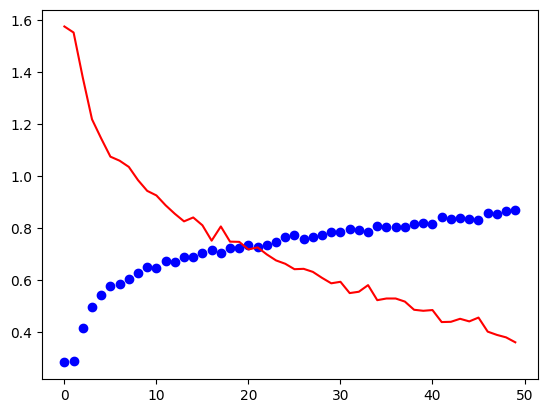

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [ ]:
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
77/77 [==============================] - 31s 399ms/step - loss: 0.3765 - accuracy: 0.8571
Epoch 2/30
77/77 [==============================] - 31s 398ms/step - loss: 0.3665 - accuracy: 0.8649
Epoch 3/30
77/77 [==============================] - 33s 432ms/step - loss: 0.3745 - accuracy: 0.8624
Epoch 4/30
77/77 [==============================] - 31s 399ms/step - loss: 0.3662 - accuracy: 0.8633
Epoch 5/30
77/77 [==============================] - 31s 402ms/step - loss: 0.3558 - accuracy: 0.8714
Epoch 6/30
77/77 [==============================] - 33s 429ms/step - loss: 0.3351 - accuracy: 0.8751
Epoch 7/30
77/77 [==============================] - 31s 402ms/step - loss: 0.3667 - accuracy: 0.8620
Epoch 8/30
77/77 [==============================] - 31s 400ms/step - loss: 0.3072 - accuracy: 0.8878
Epoch 9/30
77/77 [==============================] - 33s 435ms/step - loss: 0.3229 - accuracy: 0.8841
Epoch 10/30
77/77 [==============================] - 31s 400ms/step - loss: 0.3009 - accura

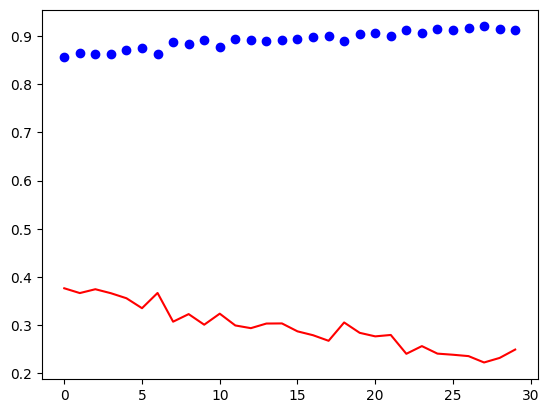

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
train = model.fit(aug.flow(x_trains, y_trains, batch_size=32),
                               epochs = 10)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
77/77 [==============================] - 32s 419ms/step - loss: 0.2424 - accuracy: 0.9171
Epoch 2/10
77/77 [==============================] - 32s 418ms/step - loss: 0.2482 - accuracy: 0.9110
Epoch 3/10
77/77 [==============================] - 32s 407ms/step - loss: 0.2082 - accuracy: 0.9265
Epoch 4/10
77/77 [==============================] - 31s 405ms/step - loss: 0.1877 - accuracy: 0.9351
Epoch 5/10
77/77 [==============================] - 33s 425ms/step - loss: 0.2459 - accuracy: 0.9163
Epoch 6/10
77/77 [==============================] - 31s 399ms/step - loss: 0.2050 - accuracy: 0.9294
Epoch 7/10
77/77 [==============================] - 31s 408ms/step - loss: 0.2272 - accuracy: 0.9220
Epoch 8/10
77/77 [==============================] - 33s 434ms/step - loss: 0.2095 - accuracy: 0.9273
Epoch 9/10
77/77 [==============================] - 31s 398ms/step - loss: 0.1797 - accuracy: 0.9327
Epoch 10/10
33/33 [==============================] - 1s 30ms/step - loss: 161.3482 - accura

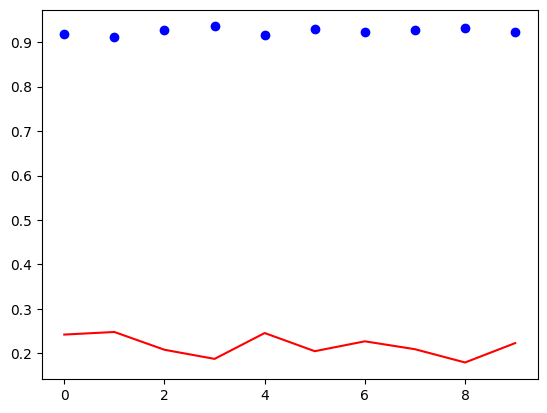

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Flower Recognition/Flower.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Flower Recognition/Flower.h5')

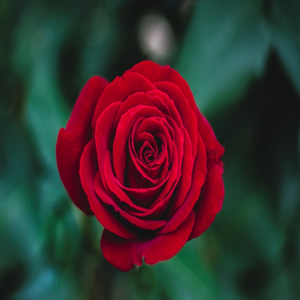

1/1 [==============================] - 0s 29ms/step
['rose']


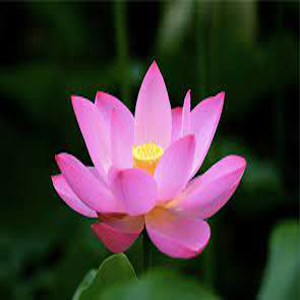

1/1 [==============================] - 0s 31ms/step
['lotus']


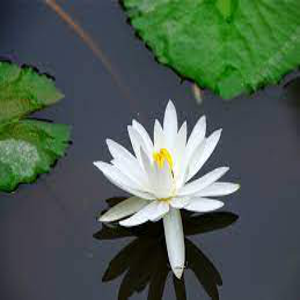

1/1 [==============================] - 0s 47ms/step
['water_lity']


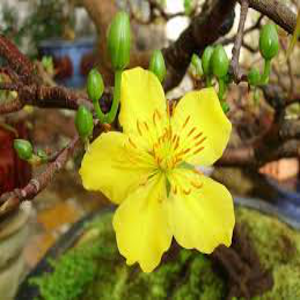

1/1 [==============================] - 0s 40ms/step
['apricot']


In [ ]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['apricot', 'daisy', 'lotus', 'rose', 'water_lity'])


# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (224, 224)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Flower Recognition/Checking data'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,224,224,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])